 **Partie 1** : Description du projet et Contexte de l’analyse

En se basant sur une statistique faite sur les goûters des enfants en france :

**Composition des goûters pris par les enfants ayant entre 3 et 17 ans en France en 2013, par produit alimentaire** 
- https://fr.statista.com/statistiques/754736/gouters-enfants-composition-par-produit-alimentaire-france/

- https://www.clubmamans.com/blog/2018/05/27/gouters-industriels-lequel-choisir-enfant/

# **Concevez une application au service de la santé publique**

**Le choix de l'application : Le Gouters des enfants en France**

# Checklist 
 
 **Lien vers la Database**

- https://world.openfoodfacts.org/ lien pour les datas
- https://world.openfoodfacts.org/data/data-fields.txt défintion de chaque variable
Le codage du fichier est Unicode UTF-8. Le caractère qui sépare les champs est <tab> (tabulation). 


**Description de la Dataset** :
- variable target : Nutri-score (à 5 modalités) et Nova groupe (à 4 modalités)
- lignes et colonnes : 1555491, 183
- types de variables : qualitatives : 58, quantitatives : 125
- Doublons: 4
- Analyse des valeurs manquantes :
    - beaucoup de NaN (moitié des variables > 98% de NaN)
    - 5 groupes de données:  information général, Mots clés, ingredients,
Apports nutritionnels ,donnée divers

**Type des variables :**

- ** Les variables quantitatives**

  - *Discrète* :'quantity','nutriscore_score'
  - *Continues* :'code','energy_100g','fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','potassium_100g','glycemic-index_100g'...

- ** Les variables qualitatives** 

  - *Nominales*: 'labels_en','categories','categories_tags',
'categories_en','pnns_groups_1' ,'pnns_groups_2'.. 
  - *Ordinales*:'nova_group','nutrition_grade_fr'

# Importing Libraries et Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

from collections import Counter

from wordcloud import WordCloud, STOPWORDS 

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#Télécharger la database
df= pd.read_csv('/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data/en_openfoodfacts_org_products.csv',sep='\t',encoding = "utf-8")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,12,18,19,20,21,22,26,27,28,30,51,63) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_nurt=df.copy()

In [ ]:
def Taux_remplissage (data):

  val_notnull = data.count().sum()
  lig,col=data.shape
  taux=val_notnull/(lig*col)*100   
  # General informations for the pie plot
  fig, ax = plt.subplots(figsize=(5, 5))
  plt.title("Taux de remplissage avant imputation", fontsize=25) 

  ax.axis("equal") 

  # Display pie plot
  ax.pie([taux, 100 - taux], labels=["Taux de remplissage", "Taux de valeurs manquantes"],autopct='%1.2f%%',explode=(0,0.1),radius=1)
  plt.legend(["Taux de remplissage", "Taux de valeurs manquantes"])

In [ ]:
def Taux_remplissage_apres (data):

  val_notnull = data.count().sum()
  lig,col=data.shape
  taux=val_notnull/(lig*col)*100   
  # General informations for the pie plot
  fig, ax = plt.subplots(figsize=(5, 5))
  plt.title("Taux de remplissage apres imputation", fontsize=25) 

  ax.axis("equal") 

  # Display pie plot
  ax.pie([taux, 100 - taux], labels=["Taux de remplissage", "Taux de valeurs manquantes"],autopct='%1.2f%%',explode=(0,0.1),radius=1)
  plt.legend(["Taux de remplissage", "Taux de valeurs manquantes"])

In [ ]:
def bar_nb_var (data,x,y):
  count=data.describe(include='all').T
  count=count['count'].sort_values(ascending=False)
  plt.figure(figsize=(x,y))
  plt.title('Nombre des données /variable',size=16)
  sns.barplot(count.values , count.index)
  plt.xticks(rotation=90)# rotation car les années ne sont visibles sur la ligne des X
  plt.show()

# Description générale du fichier CSV

In [ ]:
df.shape

(1555491, 183)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555491 entries, 0 to 1555490
Columns: 183 entries, code to carnitine_100g
dtypes: float64(123), int64(2), object(58)
memory usage: 2.1+ GB


In [ ]:
#pd.options.display.max_columns = 107
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
code,1555491,1555480,4770175482692,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url,1555491,1555482,http://world-en.openfoodfacts.org/product/6191...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creator,1555487,12589,kiliweb,824298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_t,1.55549e+06,NaN,NaN,NaN,1.54304e+09,4.73619e+07,1.32802e+09,1.51416e+09,1.55273e+09,1.58308e+09,1.60812e+09
created_datetime,1555491,1307562,2020-04-23T17:22:07Z,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_modified_t,1.55549e+06,NaN,NaN,NaN,1.57783e+09,2.70524e+07,1.33387e+09,1.56805e+09,1.58758e+09,1.59412e+09,1.60812e+09
last_modified_datetime,1555491,1197252,2019-03-16T21:14:47Z,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,1475940,983358,Aceite de oliva virgen extra,1156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generic_name,107909,79119,Ice cream,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,427214,33715,500 g,18699,NaN,NaN,NaN,NaN,NaN,NaN,NaN


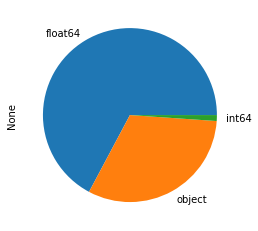

In [ ]:
df.dtypes.value_counts().plot.pie()

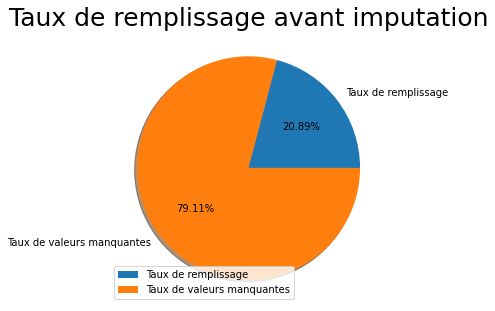

In [ ]:
Taux_remplissage(df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


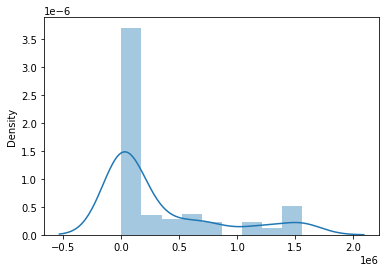

In [ ]:
sns.distplot(df.count())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


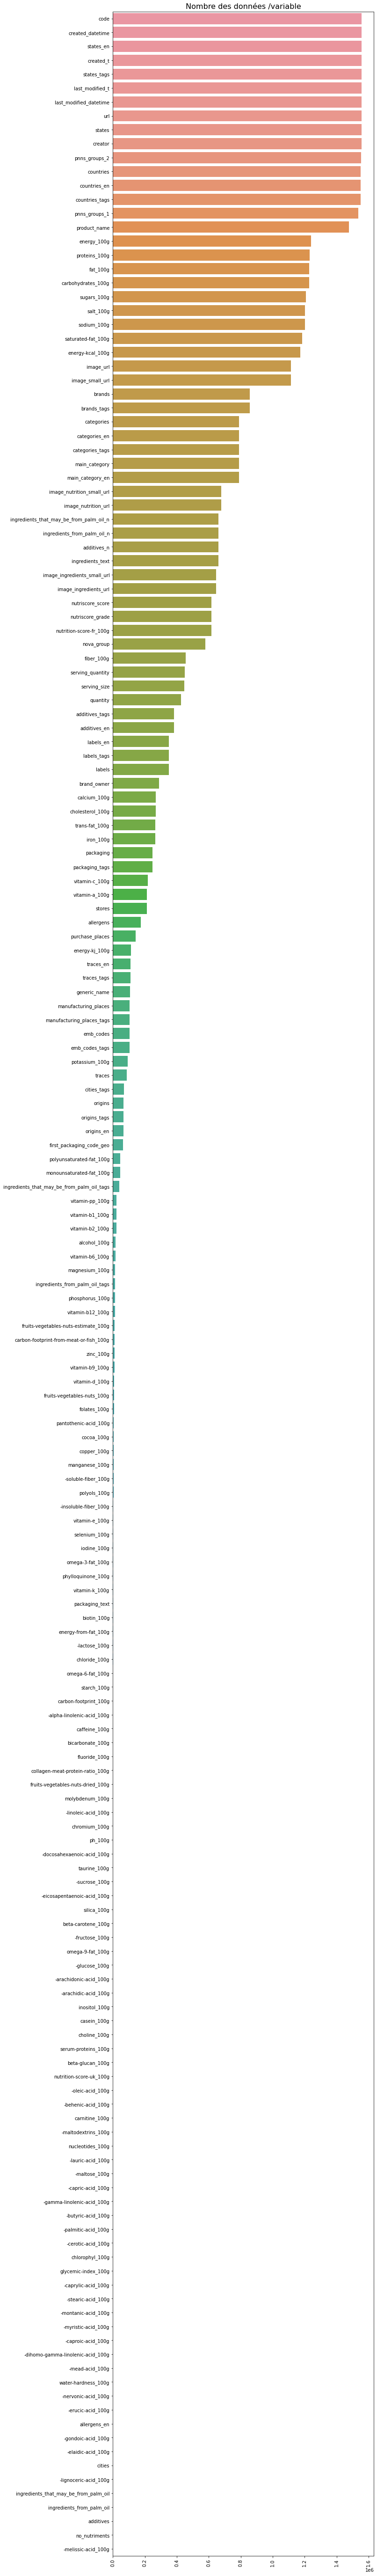

In [ ]:
bar_nb_var(df,10,100)

In [ ]:
df.columns.to_list()

In [ ]:
df.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                       int64
created_datetime                               object
last_modified_t                                 int64
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
packaging_text                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_en                                  object
origins                     

In [ ]:
Nutri_100g = df.columns[(df.columns.str.contains('_100g'))& ~(df.columns.str.contains('energy'))]
Nutri_100g

Index(['fat_100g', 'saturated-fat_100g', '-butyric-acid_100g',
       '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g',
       '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g',
       '-stearic-acid_100g',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=107)

# Cleaining  

** Les variables quantitatives**

- Discrète :'quantity','nutriscore_score'
- Continues :'code','energy_100g','fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','potassium_100g','glycemic-index_100g'...


** Les variables qualitatives**

- Nominales: 'labels_en','categories','categories_tags', 'categories_en','pnns_groups_1' ,'pnns_groups_2'..
- Ordinales:'nova_group','nutrition_grade_fr'

In [ ]:
def cleaining_data (data):

  
  #supprimer les observations ou variables et variables vides
  data.dropna(how = 'all', inplace=True) 
  data.dropna(axis = 1, how = 'all', inplace=True)
  #supprimer les produits sans nom et code
  data.dropna(subset=['code'], inplace=True)
  data.dropna(subset=['product_name'], inplace=True)
  #supprimer les codes nulles
  data.drop_duplicates(subset='code', keep='last', inplace=True)


  #préparation des variables
  data.columns = data.columns.str.replace('-','_')
  #normaliser la data et transformer les str en miniscule
  #data[:,'product_name':'carnitine_100g'] = data.loc[:,'product_name':'carnitine_100g'].apply(lambda x: x.str.lower() if(x.dtype == "object") else x)


  #variables nominales
  nominal_var = ['categories','brands','packaging',
                 'labels','labels_en','countries_en','pnns_groups_1' ,
                 'pnns_groups_2','allergens','traces_en','additives_tags',
                 'ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil_tags',
                 'main_category']

  for var in nominal_var:
    data[var] = data[var].astype('category') 

  #variables ordinale:'nova_group','nutriscore_grade'
  ordinal_var = ['nova_group','nutriscore_grade']
  from pandas.api.types import CategoricalDtype

  for var in ordinal_var:
    data[var] = data[var].astype(CategoricalDtype(ordered=True))

  #changer type de nutriscore
  #data[["nutrition_score_fr_100g","nutrition_score_uk_100g","nutriscore_score"]].astype('int')
  

  #variable temps
  df_time = ['created_t','created_datetime','last_modified_datetime','last_modified_t']
  for time in df_time:
    data[time] = pd.to_datetime(data[time])

  
  #On supprime les produits pour lesquels les valeurs sont fausses:

  #les valeurs nutritives négatives ou superieur à 100

  data=data.rename(columns={'nutrition_score_fr_100g':'nutrition_score_fr','nutrition_score_uk_100g':'nutrition_score_uk' })
  var_100g = data.columns[data.columns.str.contains('_100g')]
  for col_100g in var_100g:
   data.drop(data.loc[data[col_100g]<0].index, inplace=True)

  nutri_100g = data.columns[(data.columns.str.contains('_100g'))& ~(data.columns.str.contains('energy'))]
  for nu_100g in nutri_100g:
   data.drop(data.loc[data[nu_100g]<0].index, inplace=True)

  #valeurs seuils:supprime les valeurs fausse comme energie
  #energie :3700 si l'aliment est 100% fat = 100*
  seuil_kcal=900
  data.drop(data.loc[data['energy_kcal_100g']>seuil_kcal].index, inplace=True)

  seuil_j=3768
  data.drop(data.loc[data['energy_100g']>seuil_j].index, inplace=True)

  return data



**Calcule d'energie**
 
https://fr.wikipedia.org/wiki/Valeur_%C3%A9nerg%C3%A9tique

- Energi_element (kcal) = (9 x lipides) + (7 x alcool) + (4 x protéines) + (4 x glucides sauf polyols) + (2.4 x acides organiques) + (2.4 x polyols) + (2 x fibres)

- Energi_element (j) = (37674 x lipides) + (29300 x alcool) + (16744 x protéines) + (16744 x glucides sauf polyols) + (10040 x acides organiques) + (10040 x polyols) + (8370 x fibres)

- Energi_element (kj) = (3767 x lipides) + (2.930 x alcool) + (1.674 x protéines) + (1.674 x glucides sauf polyols) + (1.004 x acides organiques) + (1.004 x polyols) + (0.837 x fibres)

- 1 calorie vaut 180/43 soit 4.1860465116 Joules que nous arrondirons à 4,186 Joules.

- 1000 calories = 1 Kilocalorie = 1 kcal

In [ ]:
data_clean=cleaining_data (df_nurt)

In [ ]:
data_clean.shape

(1471612, 169)

on a supprimé 100000 lignes et 14 colonnes

# Choix de la catégorie

## Les catégories presentes

In [ ]:
catg=data_clean.copy()

In [ ]:
catg.shape

(1471635, 169)

In [ ]:
def choix_Catg (data,var, catg_choix, taux_var):#, taux_row):
  

  #____________________________________________________________________________________________________________
          #normaliser var
  #____________________________________________________________________________________________________________
  catg_choix=catg_choix.lower()
  catg_choix=catg_choix.replace('-', ' ')

  data[var] = data[var].astype(str).str.lower()
  data[var]= data[var].astype(str).str.replace(r'[-]', ' ', regex=True)
  data['pnns_groups_1'] = data['pnns_groups_1'].astype(str).str.lower()
  data['pnns_groups_1']= data['pnns_groups_1'].astype(str).str.replace(r'[-]', ' ', regex=True)
  
  #____________________________________________________________________________________________________________
               #choix de la categorie parmi le var
  #____________________________________________________________________________________________________________
  fg=[catg_choix]
  data=data[data[var].isin(fg)]
  n,l=data.shape

  #____________________________________________________________________________________________________________
            #je veux garder les variables: Nova_groupe, label,brand,country
  #___________________________________________________________________________________________________________
  data['nova_group'] = data['nova_group'].astype(object).replace(np.nan, "unknown")
  data['additives_n'].fillna(0, inplace=True)
  data['labels_en'] = data['labels_en'].astype(object).replace(np.nan, "no_label")
  data['countries_en'] = data['countries_en'].astype(object).replace(np.nan, "no_country")
  data['brands'] = data['brands'].astype(object).replace(np.nan, "no_brand")
  data['alcohol_100g'].fillna(0, inplace=True)
    
  #____________________________________________________________________________________________________________
         #supprimer les variables qui ont taux% de valeurs
  #____________________________________________________________________________________________________________
  for k in list(data.columns):
    if ((data[k].isna().sum()/n)*100) > taux_var:
      data.drop(k, axis=1, inplace=True)

  #____________________________________________________________________________________________________________
           #supprimer les observations qui ont taux% de valeurs
  #____________________________________________________________________________________________________________
  #data=data[(data.notnull().sum(axis=1)/l)*100 > taux_row]

  #____________________________________________________________________________________________________________
          #supprimer les aliments sans nutri_score ou energy_100g, fat_100g, carbohydrates_100g et proteins_100g
  #____________________________________________________________________________________________________________
  #data = data.dropna(subset=['nutriscore_score', 'energy_100g'],how='all')
  
  
  #____________________________________________________________________________________________________________
      #supprimer les produits qui n'ont pas au moins 10 valeurs 
  #____________________________________________________________________________________________________________
  #data=data.dropna(axis=0, thresh=10)

  # hypothèse : mettre la valeur 0 sur 'polyols_100g','fiber_100g', 'alcohol_100g': 
  list_imp=['polyols_100g','fiber_100g', 'alcohol_100g']
  if list_imp in list(data.columns):
      data[i].fillna(0)
  #____________________________________________________________________________________________________________
        #supprimer les observation ou valeurs incohérente , sum(Fat,proteine,glucide )>100
  #____________________________________________________________________________________________________________
  data.drop(data.loc[data['salt_100g']>10].index, inplace=True)
  data.drop(data.loc[data.sugars_100g > data.carbohydrates_100g ].index, inplace=True)
  data.drop(data.loc[data['saturated_fat_100g']>data['fat_100g']].index, inplace=True)
  data.drop(data.loc[(data['fat_100g']+data['carbohydrates_100g']+data['proteins_100g']+data['salt_100g'])>100].index, inplace=True)

  
  
  if 'fiber_100g' in list(data.columns):
     data.drop(data.loc[data['fiber_100g']>25].index, inplace=True)
  
 #supprimer les produits sucrés qui ont une valeur >50 g de gras
  listp=['biscuits and cakes', 'bread', 'fruit juices', 'sweetened beverages', 'fruit nectars', 'fruits','milk and yogurt', 'sweets'] 
  if catg_choix in listp:
    data.drop(data[(data['fat_100g']>60) |(data['proteins_100g']>60) |(data['energy_kcal_100g']>600)|(data['energy_100g']>2300)| (data['sodium_100g']>5)].index, 
              inplace=True)    

  #____________________________________________________________________________________________________________
        #Traitement des valeurs aberrantes
  #____________________________________________________________________________________________________________
  numeric_col = data.select_dtypes(include=['number']).columns 

  for  var_q in numeric_col:

    #upper_lim= data[var_q].quantile(0.95)
    Q1 = data[var_q].quantile(0.25)
    Q3 = data[var_q].quantile(0.75)
    IQR = Q3 - Q1
    Outliers = Q3 + 15 * IQR
    data.drop(data.loc[data [var_q] > Outliers].index, inplace=True)

  #supprimer les produits sucrés qui ont une valeur >50 g de gras
  #listp=['biscuits and cakes', 'bread', 'fruit juices', 'sweetened beverages', 'fruit nectars', 'fruits','milk and yogurt', 'sweets'] 
  #if catg_choix in listp:
   # if 'fiber_100g' in list(data.columns):
    #  data.drop(data[(data['fat_100g']>50) |(data['proteins_100g']>50) |(data['alcohol_100g']>40)
     # |(data['energy_kcal_100g']>550)|(data['energy_100g']>2300) | (data['fiber_100g']>40)
     #| (data['salt_100g']>20)| (data['sodium_100g']>20)].index, inplace=True)
    #else:
     # data.drop(data[(data['fat_100g']>50) |(data['proteins_100g']>50) |(data['alcohol_100g']>40)|(data['energy_kcal_100g']>550)|(data['energy_100g']>2300)| (data['salt_100g']>20)| (data['sodium_100g']>20)].index, inplace=True)    

  #supprimer les produits sucrés qui ont une valeur <10 g de carb
  listp=['biscuits and cakes', 'bread', 'sweetened beverages', 'chocolate products', 'sweets'] 
  if catg_choix in listp:
    data.drop(data[(data['carbohydrates_100g']<10)].index, inplace=True)
    data.drop(data[(data['alcohol_100g']>10)].index, inplace=True)
    data.drop(data[(data['fat_100g']>55)].index, inplace=True)
    data.drop(data[(data['energy_kcal_100g']>600)].index, inplace=True)
    data.drop(data[(data['salt_100g']>20)].index, inplace=True)



  # ____________________________________________________________________________________________________________
                                                 #Imputation energie
  #____________________________________________________________________________________________________________
  

  if list_imp in list(data.columns):
    data['energy_100g'].fillna(data['fat_100g']*37.76 + data['carbohydrates_100g']*16.744 + data['proteins_100g']*16.744 + data['alcohol_100g']*29.300\
                             + data['fiber_100g']*8.370+ data['polyols_100g']*1.040, inplace=True)
  else :
    data['energy_100g'].fillna(data['fat_100g']*37.674 + data['carbohydrates_100g']*16.744 + data['proteins_100g']*16.744 , inplace=True)
  
  data['energy_kcal_100g'].fillna(data['energy_100g']/(4.186), inplace=True)
  data['energy_100g'].fillna(data['energy_kcal_100g']*(4.186), inplace=True)

  #____________________________________________________________________________________________________________
                                                 #Imputation
  #____________________________________________________________________________________________________________

  imp = IterativeImputer(missing_values=np.nan, sample_posterior=True, max_iter=10, tol=0.001, n_nearest_features=None, initial_strategy='median')
  imp.fit(data[numeric_col])
  imputed_df = imp.transform(data[numeric_col])
  imputed_df = pd.DataFrame(imputed_df, columns=data[numeric_col].columns)
  
  #____________________________________________________________________________________________________________
        #supprimer les Variables non-intéressantes pour le projet ou en double comme _tag ou_datatime
  #____________________________________________________________________________________________________________

  data.drop(data.columns[data.columns.str.contains('image')], axis='columns', inplace=True)
  data.drop(data.columns[data.columns.str.contains('_datetime')], axis='columns', inplace=True)
  data.drop(data.columns[data.columns.str.contains('_tags')], axis='columns', inplace=True)
  data.drop(data.columns[data.columns.str.contains('serving')], axis='columns', inplace=True)
  data.drop(data.columns[data.columns.str.contains('main_category')], axis='columns', inplace=True)
  data.drop(data.columns[data.columns.str.contains('_fr')], axis='columns', inplace=True)
  data.drop(data.columns[data.columns.str.contains('_uk')], axis='columns', inplace=True)




  return data
  

# Snacks Data

- Céreal : 'biscuits et gateaux',"bread"
- Boisson : "fruit juices","sweetened beverages","fruit nectars","waters and flavored waters"
- Fruit: 'fruits' ,'dried_fruits'
- Yaourts: 'milk and yogurt'
- Autres produit sucrée: "produit_sucree"

In [ ]:
#apporter les images des allergens 
from google.colab import files
from IPython import display
uploaded = files.upload()

Saving Capture d’écran 2021-01-08 145525.png to Capture d’écran 2021-01-08 145525.png


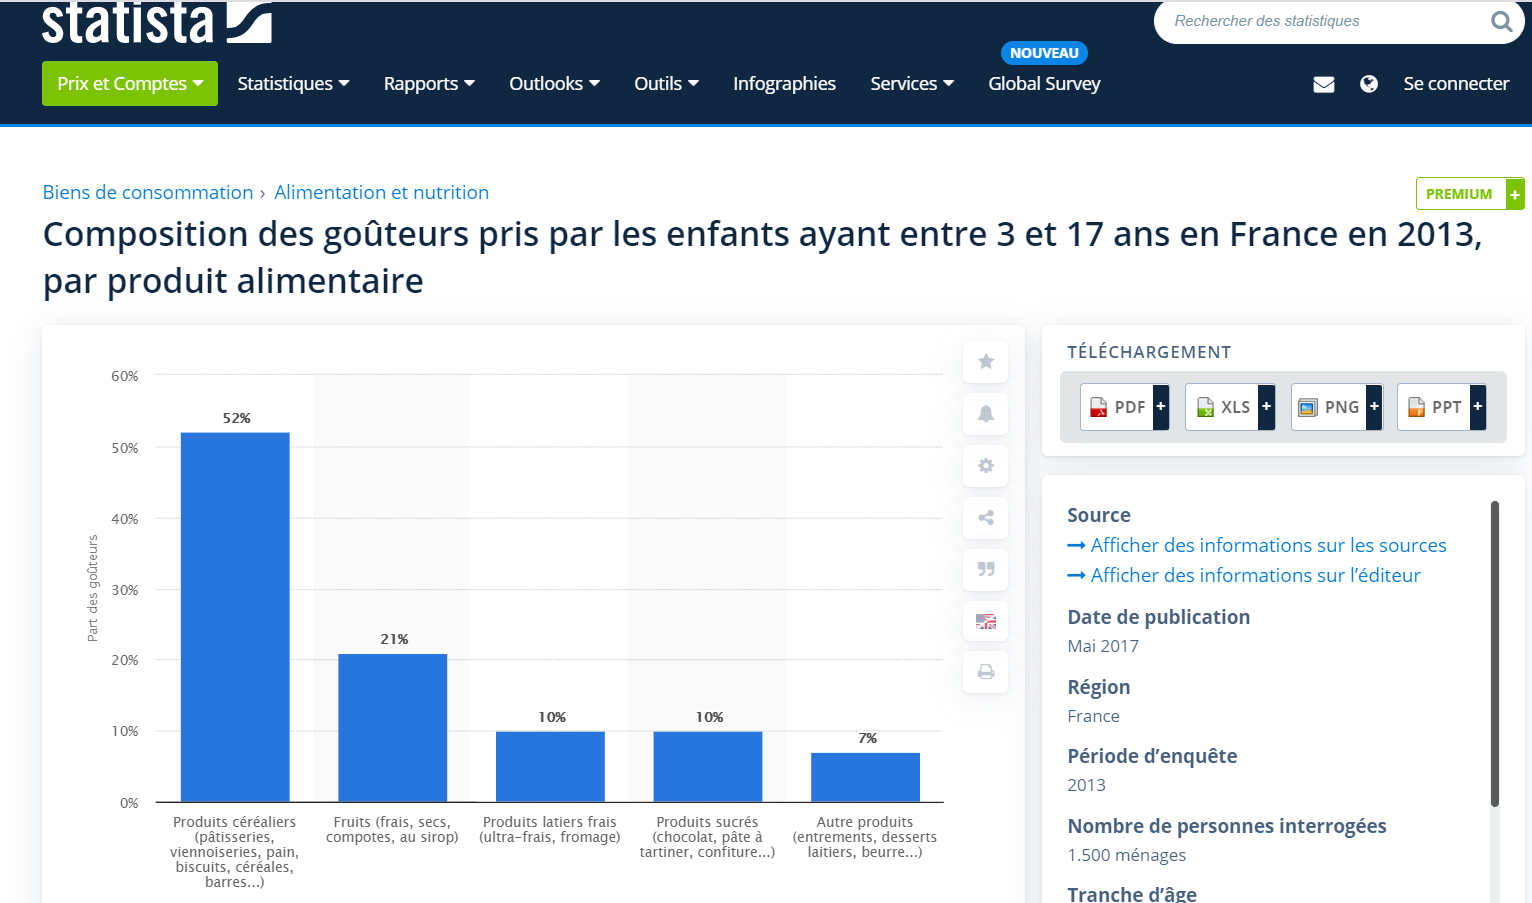

In [ ]:
display.Image("Capture d’écran 2021-01-08 145525.png", width=700)

In [ ]:
fg=['biscuits and cakes']
data_b=data_clean[data_clean['pnns_groups_2'].isin(fg)]

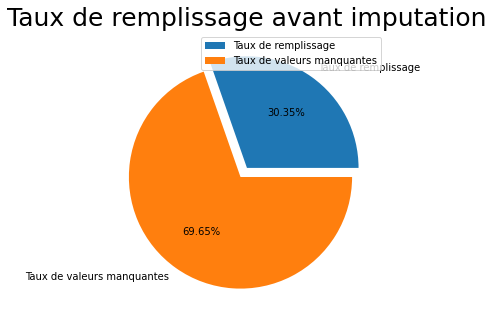

In [ ]:
Taux_remplissage(data_b)

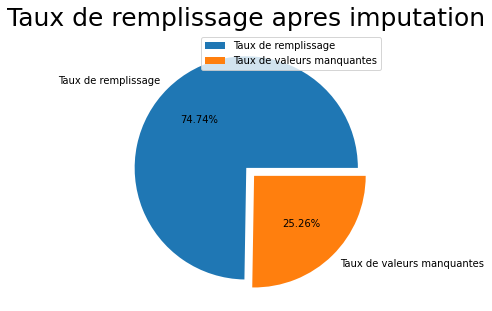

In [ ]:
Taux_remplissage_apres(data_bis)

In [ ]:
data_bis=choix_Catg (data_clean,'pnns_groups_2','biscuits and cakes',80)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [ ]:
data_bread=choix_Catg (data_clean,'pnns_groups_2','bread',80)
data_juice=choix_Catg (data_clean,'pnns_groups_2','fruit juices',80)
data_soda=choix_Catg (data_clean,'pnns_groups_2','sweetened beverages',80)
data_fru_nec=choix_Catg (data_clean,'pnns_groups_2','fruit nectars',80)
data_fruit=choix_Catg (data_clean,'pnns_groups_2','fruits',80)
data_dried_fruit=choix_Catg (data_clean,'pnns_groups_2','dried fruits',80)
data_yogurt=choix_Catg (data_clean,'pnns_groups_2','milk and yogurt',80)
data_sweets=choix_Catg (data_clean,'pnns_groups_2','sweets',80)
data_chocolat=choix_Catg (data_clean,'pnns_groups_2','chocolate products',80)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [ ]:
#creer la database à partir des data_catégories
data_gouter=pd.concat([data_bis,data_bread,data_juice,data_soda,data_fru_nec,data_fruit,data_dried_fruit,data_yogurt,data_sweets,data_chocolat])


In [ ]:
data_gouter.shape

(178351, 55)

In [ ]:
data_gouter.shape

(186907, 44)

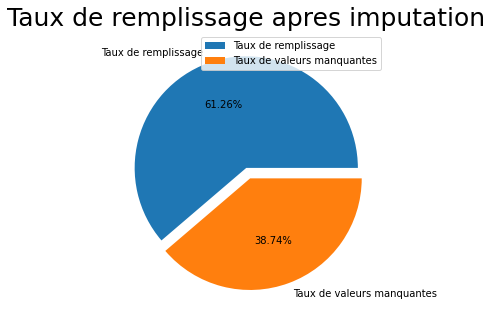

In [ ]:
Taux_remplissage_apres(data_gouter)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


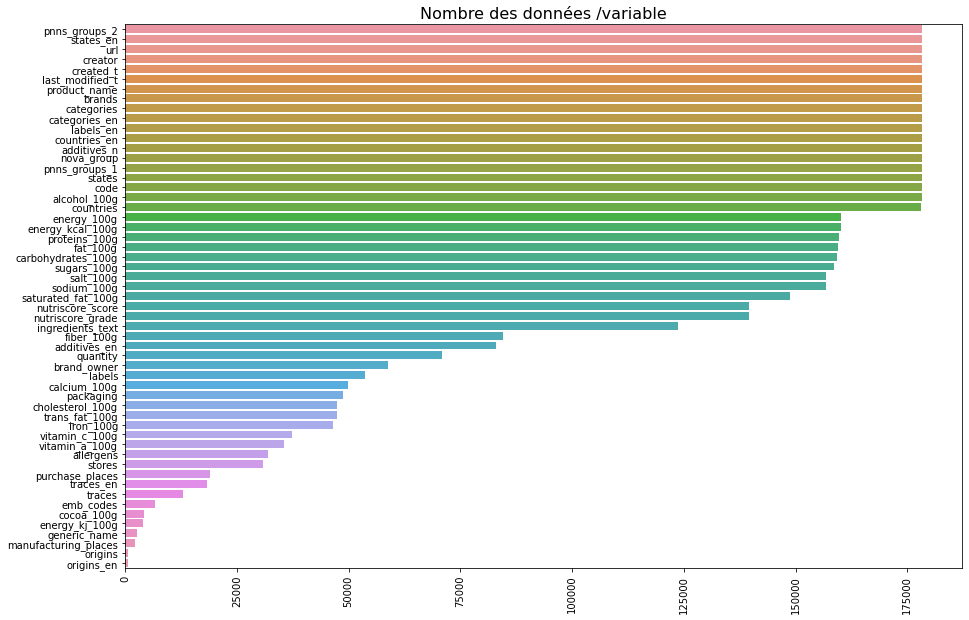

In [ ]:
bar_nb_var(data_gouter,15,10)

# Choix zone géographique

In [ ]:
def choix_country (data,country):
  
  #____________________________________________________________________________________________________________
          #choix pays
  #____________________________________________________________________________________________________________
  country=country.lower()
  
  data['countries_en'] = data['countries_en'].astype(str).str.lower()
  data['countries_en']= data['countries_en'].astype(str).str.replace(r'[,]', ' ', regex=True)

  if country in data.countries_en.unique():
    data=data[data['countries_en'].isin([country])]

  else:
    print('Ce pay n\'existe pas')
 
  return data

In [ ]:
data_country=choix_country (data_gouter,'France')#,40)c

In [ ]:
data_country.shape

(66514, 44)

In [ ]:
for k in list(data_country.columns):
  if ((data_country[k].isna().sum()/len(data_country))*100) > 90:
    data_country.drop(k, axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_country.shape

(70319, 35)

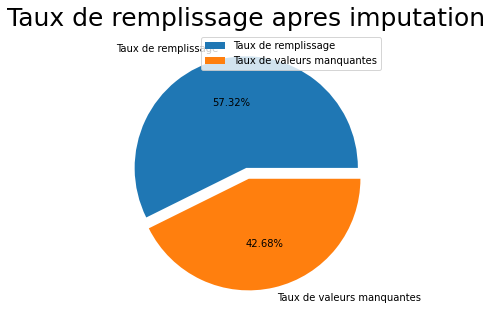

In [ ]:
Taux_remplissage_apres(data_country)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


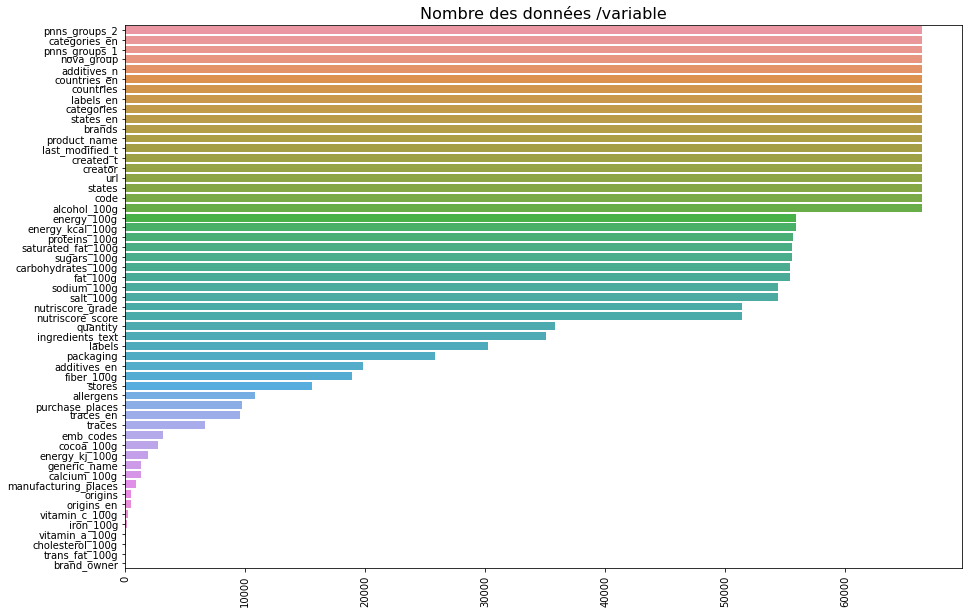

In [ ]:
bar_nb_var(data_country,15,10)

In [ ]:
data_gouter.columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'last_modified_t',
 'product_name',
 'quantity',
 'packaging',
 'brands',
 'categories',
 'categories_en',
 'labels',
 'labels_en',
 'purchase_places',
 'stores',
 'countries',
 'countries_en',
 'ingredients_text',
 'allergens',
 'traces',
 'traces_en',
 'additives_n',
 'additives_en',
 'nutriscore_score',
 'nutriscore_grade',
 'nova_group',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_en',
 'brand_owner',
 'energy_kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated_fat_100g',
 'trans_fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'alcohol_100g',
 'vitamin_a_100g',
 'vitamin_c_100g',
 'calcium_100g',
 'iron_100g',
 'energy_kj_100g',
 'origins',
 'origins_en',
 'emb_codes',
 'generic_name',
 'manufacturing_places',
 'cocoa_100g']

In [ ]:
var_nutr=[ 'energy_kcal_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g',
          'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g',
          'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g',
          'vitamin_a_100g', 'vitamin_c_100g', 'calcium_100g', 'iron_100g', 'cocoa_100g']

In [ ]:
var_gen=['code', 'url', 'creator', 'created_t', 'last_modified_t', 'product_name', 'emb_codes', 'generic_name']
var_tag=[ 'quantity', 'packaging', 'brands', 'categories', 'categories_en',
          'labels', 'labels_en','purchase_places', 'stores', 'countries',
          'countries_en', 'origins', 'origins_en','manufacturing_places','ingredients_text', 'allergens', 'traces', 'traces_en',]

In [ ]:
var_grade=[ 'additives_n', 'additives_en', 'nutriscore_score', 'nutriscore_grade',
           'nova_group', 'pnns_groups_1', 'pnns_groups_2']

# Sauvegarde de la DataFrame nettoyée

In [ ]:
data_gouter.drop(data_gouter.loc[data_gouter['additives_n']>10].index, inplace=True)

data_nutrition=data_gouter.copy()

In [ ]:
# Enregistrement au format CSV
data_nutrition.to_csv('/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data/data_nutrition2.csv',index=False)

In [ ]:
data_nutrition.columns

Index(['code', 'url', 'creator', 'created_t', 'last_modified_t',
       'product_name', 'brands', 'categories', 'categories_en', 'labels_en',
       'countries', 'countries_en', 'ingredients_text', 'allergens',
       'additives_n', 'additives_en', 'nutriscore_score', 'nutriscore_grade',
       'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_en',
       'brand_owner', 'energy_kcal_100g', 'energy_100g', 'fat_100g',
       'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'alcohol_100g', 'calcium_100g', 'iron_100g',
       'quantity', 'packaging', 'labels', 'traces', 'traces_en'],
      dtype='object')

In [ ]:
da_test=da_test[da_test['additives_n']>5]
da_test[['additives_n','pnns_groups_2','product_name', 'quantity']]

In [ ]:
data_fruit[['nova_group','product_name','additives_n','ingredients_text']].sample(20)

,nova_group,product_name,additives_n,ingredients_text
601698,3,Compote Veloutée pomme/poire,2.0,"Pomme 60 % minimum, poire 30 %, sucre liquide,..."
665759,3,Gourdes allégée en sucres pomme fraise,1.0,"Pomme 74%, fraise 20%, sucre, cassis, antioxyd..."
1466176,unknown,Fruta variada,0.0,NaN
1203928,3,Diced peaches in light syrup,1.0,"Peaches, water, sugar, ascorbic acid, citric a..."
806707,1,Compotée de rhubarbes,0.0,"Rhubarbes 70%, pommes 30%."
45181,4,"Del monte, sliced pears in heavy syrup",2.0,"Pears, water, ascorbic acid (vitamin c), acesu..."
299755,1,Ripen at home plums,0.0,Plums.
202731,3,Yellow Cling Peach Halves In Heavy Syrup,0.0,"Peaches, water, corn syrup, sugar."
1116507,4,Compote à l'abricot,2.0,"abricots, sucre, sirop de glucose-fructose, ép..."
113432,3,Applesauce,0.0,"Apples, sugar, water and ascorbic acid (to mai..."


In [ ]:
data_nutrition[['carbohydrates_100g','energy_kcal_100g','fat_100g','proteins_100g','salt_100g','product_name', 'fiber_100g']].sample(20)

,carbohydrates_100g,energy_kcal_100g,fat_100g,proteins_100g,salt_100g,product_name,fiber_100g
654489,19.8,118.251314,2.30,4.3,0.100000,Yaourt Pur brebis sur lit de Cerises noires,NaN
973312,70.0,370.000000,3.70,9.3,0.500000,Cacao à la sève de fleur de cocotier,NaN
834780,13.0,91.000000,2.80,3.5,0.100000,Yaourt bio fruit,0.5
310237,79.2,321.000000,0.00,0.0,0.052900,Sirop Noisette,NaN
779342,57.0,233.000000,0.03,0.0,0.000000,Cinfiture de mangue au jasmin,NaN
1289974,57.7,505.000000,27.10,10.1,0.100000,Chocobella,NaN
637364,74.0,445.000000,13.00,7.0,1.000000,"Galette Normandes, Au Beurre D'isigny. Offre S...",2.0
900577,63.6,475.000000,21.50,6.2,0.000000,Galettes normandes,NaN
664322,82.0,333.000000,0.10,0.1,0.010000,Sirop de Grenadine,NaN
752753,72.0,319.000000,1.00,3.3,0.530000,Pain d'épices tranché figues et raisins Saveurs,4.2


In [ ]:
da_test=df[df['carbohydrates_100g']<df['sugars_100g']].sample(10)
da_test[['carbohydrates_100g','sugars_100g','url', 'product_name','image_nutrition_url']]


,carbohydrates_100g,sugars_100g,url,product_name,image_nutrition_url
458981,0.00,0.60,http://world-en.openfoodfacts.org/product/2006...,Cheese in brine,https://static.openfoodfacts.org/images/produc...
416323,10.14,10.47,http://world-en.openfoodfacts.org/product/0857...,Soda,NaN
1002780,2.50,23.00,http://world-en.openfoodfacts.org/product/4056...,NaN,NaN
1509106,0.00,0.50,http://world-en.openfoodfacts.org/product/8717...,Ghee Easy - Natural Ghee - 100G,https://static.openfoodfacts.org/images/produc...
630695,1.00,1.20,http://world-en.openfoodfacts.org/product/3220...,Rillettes aux saumons atlantique en poche à dr...,https://static.openfoodfacts.org/images/produc...
1228460,97.00,100.00,http://world-en.openfoodfacts.org/product/7610...,Sucre de canne brut en poudre,https://static.openfoodfacts.org/images/produc...
374398,0.00,6.67,http://world-en.openfoodfacts.org/product/0786...,Uncured Bacon,NaN
329537,0.00,3.45,http://world-en.openfoodfacts.org/product/0687...,"Sierra Nevada Cheese Company, Bella Capra, Bel...",NaN
341328,3.33,6.67,http://world-en.openfoodfacts.org/product/0711...,Authentic Mexican Salsa,NaN
42333,11.50,13.27,http://world-en.openfoodfacts.org/product/0022...,Organic Apple Sauce,NaN


In [ ]:
da_test=df[df['energy_100g']<0].sample(1)
da_test[['vitamin-c_100g','sugars_100g','url', 'product_name','image_nutrition_url']]


,vitamin-c_100g,sugars_100g,url,product_name,image_nutrition_url


In [ ]:
da_test.url.unique

<bound method Series.unique of 52438    http://world-en.openfoodfacts.org/product/0028...
Name: url, dtype: object>